Mounted at /content/drive


In [1]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
!pip install np_utils

     ---------------------------------------- 62.0/62.0 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56442 sha256=807bc5c9c29a3321c500c0ed01c48518cdab1d45577876a1791fb93a2126a221
  Stored in directory: c:\users\owner\appdata\local\pip\cache\wheels\65\07\4b\1c96f437e1bec60b3d2acd0b81d0a7969505f5251efbb5a060
Successfully built np_utils


In [31]:
import numpy as np
import pandas as pd
from plotly.offline import iplot
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D,GRU
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))

In [76]:
df = pd.DataFrame()
df = pd.read_excel (r'./test_sample_2.xlsx')

In [77]:
df.head()

No1                           Product       No2  \
0  REQ-44585                      All Products   GEN 130   
1  REQ-44030  Cagrilintide/Semaglutide Obesity  CSOB 001   
2  REQ-44378                        Concizumab   CON 002   
3        NaN                        Concizumab   HEM 300   
4  REQ-44379                        Concizumab   CON 002   

                        Consumer complaint narrative  
0  We would like to have a pharmaceutical rep cal...  
1     Dr. Nimer would like information on CagriSema?  
2  Please send following on Mim8 and Conciz \nSha...  
3  Please send following on Mim8 and Conciz \nSha...  
4  Shapiro et al. Publication on Phase 2 Explorer...

In [78]:
df.columns

Index(['No1', 'Product', 'No2', 'Consumer complaint narrative'], dtype='object')

In [79]:
data = df[['Consumer complaint narrative','Product']]
data = data.dropna()
data.head(1000)

Consumer complaint narrative  \
0    We would like to have a pharmaceutical rep cal...   
1       Dr. Nimer would like information on CagriSema?   
2    Please send following on Mim8 and Conciz \nSha...   
3    Please send following on Mim8 and Conciz \nSha...   
4    Shapiro et al. Publication on Phase 2 Explorer...   
..                                                 ...   
995  What is Novo currently studying for pediatric ...   
996  Inquiry Text: This is for saxenda and wegovy -...   
997  Please e-mail HCP with the following informati...   
998  Is Saxenda contraindicated with a personal his...   
999  A patient with a family history of thyroid can...   

                              Product  
0                        All Products  
1    Cagrilintide/Semaglutide Obesity  
2                          Concizumab  
3                          Concizumab  
4                          Concizumab  
..                                ...  
995                           Saxenda  
996                           Saxenda  
997                           Saxenda  
998                           Saxenda  
999                           Saxenda  

[1000 rows x 2 columns]

In [80]:
data.shape

(1318, 2)

In [82]:
data.dtypes

Consumer complaint narrative    object
Product                         object
dtype: object

In [83]:
data.Product.value_counts()

Ozempic                             618
Rybelsus                            204
Wegovy                              144
Saxenda                             101
Semaglutide (NASH)                   33
General-GLP-1                        29
General                              28
Tresiba                              21
Victoza                              19
General-Obesity                      17
Fiasp                                14
Norditropin                          14
Rebinyn                              11
Insulin Portfolio                    10
Sogroya                               9
NovoLog                               8
Devices - Insulin                     5
Concizumab                            5
Levemir                               4
NovoSeven RT                          4
GlucaGen                              3
Esperoct                              3
Vagifem                               2
All Products                          1
Nedosiran                             1


In [58]:
data.reset_index(inplace = True)
data.drop('index',axis='columns', inplace=True)

In [59]:
data.Product.value_counts()

Ozempic     618
Rybelsus    204
Wegovy      144
Saxenda     101
Name: Product, dtype: int64

In [60]:
data.head()

Consumer complaint narrative  Product
0  Provider has a patient with type 2 diabetes wh...  Ozempic
1  Is there any reason you would not want to use ...  Ozempic
2  Please email me a copy of the updated Ozempic ...  Ozempic
3  Please email me a copy of the updated Ozempic ...  Ozempic
4  Christina would like to know if there is data ...  Ozempic

In [61]:
def example_complain(index):
    example = data[data.index == index][['Consumer complaint narrative', 'Product']].values[0]
    if len(example) > 0:
        print(example[0])
        print()
        print('Category:', example[1])

In [62]:
example_complain(10)

Please send info on Ozempic regarding GFR? Is there a GFR where Ozempic should not be used?

Would also like data on Ozempic and CHF.

Category: Ozempic


In [63]:
data = data.reset_index(drop=True)
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))
def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
data['Consumer complaint narrative'] = data['Consumer complaint narrative'].apply(clean_text)

In [64]:
example_complain(10)

please send info ozempic regarding gfr gfr ozempic usedwould also like data ozempic chf

Category: Ozempic


In [65]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(data['Consumer complaint narrative'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 2207 unique tokens.


In [66]:
X = tokenizer.texts_to_sequences(data['Consumer complaint narrative'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (1067, 250)


In [67]:
Y = pd.get_dummies(data['Product']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (1067, 4)


In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 2)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(960, 250) (960, 4)
(107, 250) (107, 4)


In [69]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(GRU(units=32,dropout=0.2,recurrent_dropout=0.2))
model.add(Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 250, 100)          5000000   
                                                                 
 gru_2 (GRU)                 (None, 32)                12864     
                                                                 
 dense_7 (Dense)             (None, 4)                 132       
                                                                 
Total params: 5,012,996
Trainable params: 5,012,996
Non-trainable params: 0
_________________________________________________________________
None


In [70]:
epochs = 5
batch_size = 30
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1)

Epoch 1/5
29/29 [==============================] - 9s 238ms/step - loss: 1.2762 - accuracy: 0.5590 - val_loss: 1.1799 - val_accuracy: 0.5104
Epoch 2/5
29/29 [==============================] - 6s 221ms/step - loss: 0.9722 - accuracy: 0.5868 - val_loss: 1.0574 - val_accuracy: 0.5312
Epoch 3/5
29/29 [==============================] - 6s 219ms/step - loss: 0.6866 - accuracy: 0.7222 - val_loss: 0.9393 - val_accuracy: 0.6771
Epoch 4/5
29/29 [==============================] - 6s 221ms/step - loss: 0.4075 - accuracy: 0.8600 - val_loss: 0.8626 - val_accuracy: 0.7292
Epoch 5/5
29/29 [==============================] - 6s 221ms/step - loss: 0.2671 - accuracy: 0.9271 - val_loss: 0.9993 - val_accuracy: 0.7188


In [71]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

4/4 [==============================] - 0s 23ms/step - loss: 0.6080 - accuracy: 0.8224
Test set
  Loss: 0.608
  Accuracy: 0.822


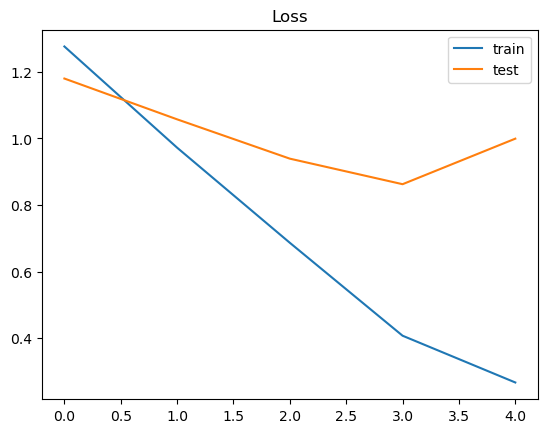

In [72]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

KeyError: 'acc'

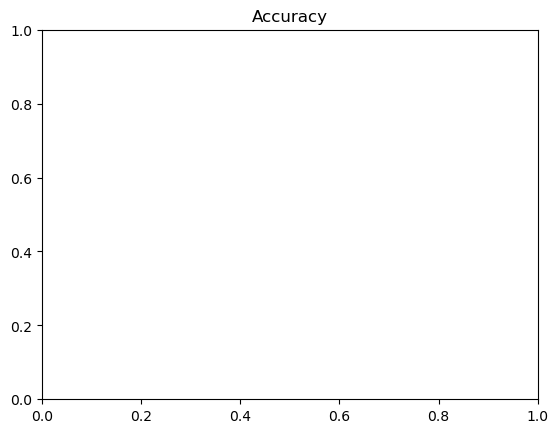

In [73]:
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show();

In [75]:
new_complaint = ['Serious adverse reactions:-  Medullary thyroid carcinoma- what are rates of this cancer compared to other thyroid cancers? - Diabetic retinopathy: why does it get get worse with this medication due to rapid lowering sugar? How does this compare to rapid']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ["Ozempic","Rybelsus","Wegovy","Saxenda"]
print(pred, labels[np.argmax(pred)])

1/1 [==============================] - 0s 39ms/step
[[0.052445   0.93074733 0.00645453 0.01035311]] Rybelsus
